In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
0
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("Dataset.csv", encoding='utf-8')

data.head()

,NR. CRT,Categoria 1,Categoria 2,Categoria 3,Ziua saptamanii,Ziua lunii,Luna,Anul,Rata inflatiei BNR pe trimestru,Rata somaj BIM lunara,Vacanta/zi libera/weekend/ Black Friday,"Abnormal situations (alerta, urgenta, razboi, pandemie)"
0,1,336.04,217.81,68.45,7,1,1,2012,2.4,9.1,1,0
1,2,209.02,135.86,47.03,1,2,1,2012,2.4,9.1,1,0
2,3,1060.88,698.47,217.45,2,3,1,2012,2.4,9.1,0,0
3,4,1167.06,749.23,244.94,3,4,1,2012,2.4,9.1,0,0
4,5,197.32,128.69,41.67,4,5,1,2012,2.4,9.1,0,0


In [7]:
data.dtypes

NR. CRT                                                      int64
Categoria 1                                                float64
Categoria 2                                                float64
Categoria 3                                                float64
Ziua saptamanii                                              int64
Ziua lunii                                                   int64
Luna                                                         int64
Anul                                                         int64
Rata inflatiei BNR pe trimestru                            float64
Rata somaj BIM lunara                                      float64
Vacanta/zi libera/weekend/ Black Friday                      int64
Abnormal situations (alerta, urgenta, razboi, pandemie)      int64
dtype: object

In [8]:
data.columns.values

array(['NR. CRT', 'Categoria 1', 'Categoria 2', 'Categoria 3',
       'Ziua saptamanii', 'Ziua lunii', 'Luna', 'Anul',
       'Rata inflatiei BNR pe trimestru', 'Rata somaj BIM lunara',
       'Vacanta/zi libera/weekend/ Black Friday',
       'Abnormal situations (alerta, urgenta, razboi, pandemie)'],
      dtype=object)

In [9]:
data.shape

(3743, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   NR. CRT                                                  3743 non-null   int64  
 1   Categoria 1                                              3743 non-null   float64
 2   Categoria 2                                              3743 non-null   float64
 3   Categoria 3                                              3743 non-null   float64
 4   Ziua saptamanii                                          3743 non-null   int64  
 5   Ziua lunii                                               3743 non-null   int64  
 6   Luna                                                     3743 non-null   int64  
 7   Anul                                                     3743 non-null   int64  
 8   Rata inflatiei BNR pe trimes

In [11]:
data.describe()

,NR. CRT,Categoria 1,Categoria 2,Categoria 3,Ziua saptamanii,Ziua lunii,Luna,Anul,Rata inflatiei BNR pe trimestru,Rata somaj BIM lunara,Vacanta/zi libera/weekend/ Black Friday,"Abnormal situations (alerta, urgenta, razboi, pandemie)"
count,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000
mean,1872.000000,5802.604961,3784.237673,1228.782308,3.999199,15.726690,6.413572,2016.631846,2.599458,6.950281,0.332087,0.199305
std,1080.655357,6943.982845,4525.702129,1490.269745,2.000467,8.799953,3.479719,2.960757,2.679502,1.518612,0.476665,0.399531
min,1.000000,55.860000,36.430000,11.800000,1.000000,1.000000,1.000000,2012.000000,-2.980000,4.800000,0.000000,0.000000
25%,936.500000,1463.180000,957.855000,309.010000,2.000000,8.000000,3.000000,2014.000000,0.830000,5.500000,0.000000,0.000000
50%,1872.000000,3605.330000,2350.730000,767.870000,4.000000,16.000000,6.000000,2017.000000,2.450000,6.500000,0.000000,0.000000
75%,2807.500000,7296.575000,4775.825000,1540.730000,6.000000,23.000000,9.000000,2019.000000,4.040000,8.600000,1.000000,0.000000
max,3743.000000,64597.150000,41868.530000,18753.400000,7.000000,31.000000,12.000000,2022.000000,10.150000,9.100000,2.000000,1.000000


In [12]:
data.isna().sum()

NR. CRT                                                    0
Categoria 1                                                0
Categoria 2                                                0
Categoria 3                                                0
Ziua saptamanii                                            0
Ziua lunii                                                 0
Luna                                                       0
Anul                                                       0
Rata inflatiei BNR pe trimestru                            0
Rata somaj BIM lunara                                      0
Vacanta/zi libera/weekend/ Black Friday                    0
Abnormal situations (alerta, urgenta, razboi, pandemie)    0
dtype: int64

In [13]:
data_sample = data.loc[:, ['Categoria 3',
       'Ziua saptamanii', 'Ziua lunii', 'Luna',
       'Rata inflatiei BNR pe trimestru', 'Rata somaj BIM lunara',
       'Vacanta/zi libera/weekend/ Black Friday',
       'Abnormal situations (alerta, urgenta, razboi, pandemie)']]

array([[<Axes: title={'center': 'Categoria 3'}>,
        <Axes: title={'center': 'Ziua saptamanii'}>,
        <Axes: title={'center': 'Ziua lunii'}>],
       [<Axes: title={'center': 'Luna'}>,
        <Axes: title={'center': 'Rata inflatiei BNR pe trimestru'}>,
        <Axes: title={'center': 'Rata somaj BIM lunara'}>],
       [<Axes: title={'center': 'Vacanta/zi libera/weekend/ Black Friday'}>,
        <Axes: title={'center': 'Abnormal situations (alerta, urgenta, razboi, pandemie)'}>,
        <Axes: >]], dtype=object)

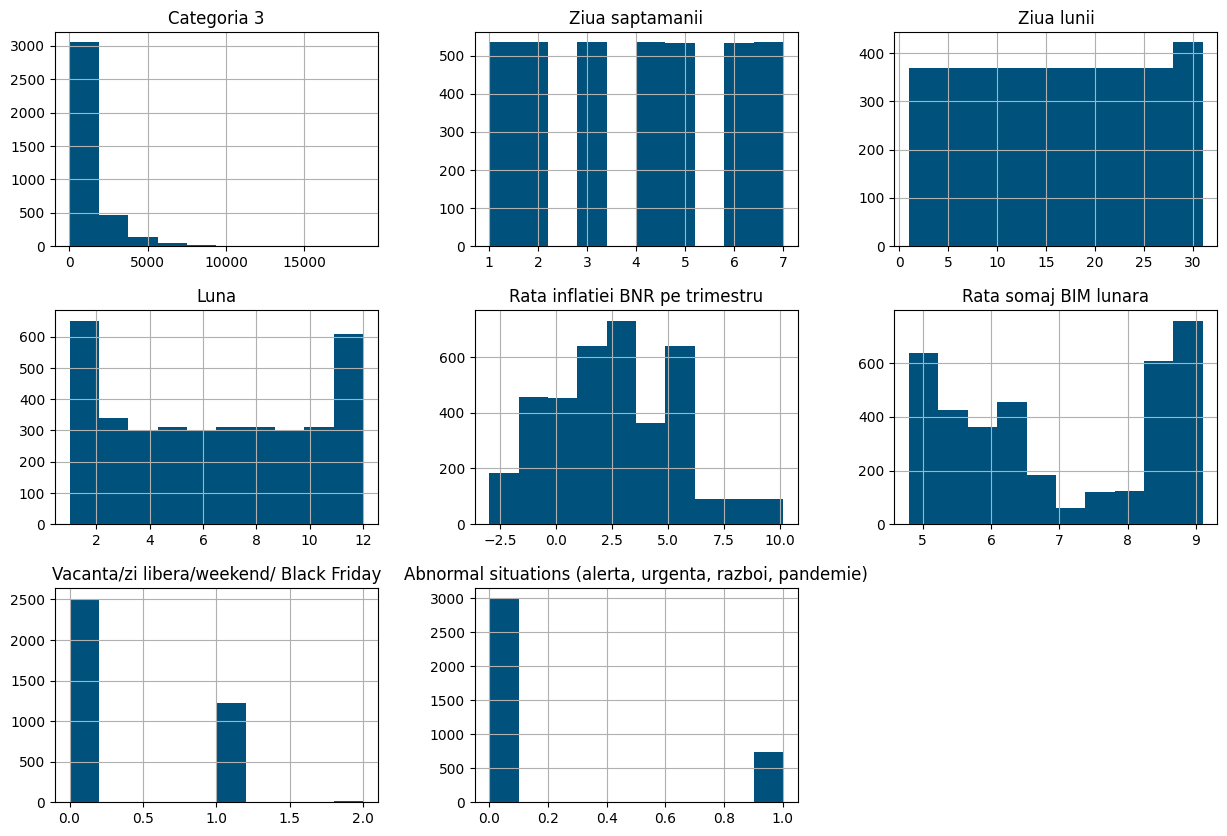

In [14]:
data_sample.hist(bins=10, color = '#00517C', figsize=(15, 10))

In [15]:
data_sample.corr().stack()[data_sample.corr().stack()<1].drop_duplicates().abs().sort_values(ascending=False).reset_index()

,level_0,level_1,0
0,Ziua saptamanii,Vacanta/zi libera/weekend/ Black Friday,0.701755
1,Rata inflatiei BNR pe trimestru,"Abnormal situations (alerta, urgenta, razboi, ...",0.408890
2,Rata inflatiei BNR pe trimestru,Rata somaj BIM lunara,0.400264
3,Categoria 3,"Abnormal situations (alerta, urgenta, razboi, ...",0.381966
4,Rata somaj BIM lunara,"Abnormal situations (alerta, urgenta, razboi, ...",0.362628
5,Categoria 3,Vacanta/zi libera/weekend/ Black Friday,0.345806
6,Categoria 3,Rata somaj BIM lunara,0.314531
7,Categoria 3,Ziua saptamanii,0.304429
8,Categoria 3,Rata inflatiei BNR pe trimestru,0.227830
9,Categoria 3,Luna,0.190823


In [16]:
X = data_sample.drop(columns=['Categoria 3'])

y = data_sample['Categoria 3']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [18]:
#pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()) ])
pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', MinMaxScaler()) ])
X_train = pipeline.fit_transform(X_train)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
X_test = pipeline.transform(X_test)
y_pred = lin_reg.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
print("mse : " + str(mse))


mse : 1544004.2359427367


In [22]:
rmse = np.sqrt(mse)
print("rmse : " + str(rmse))

rmse : 1242.5796698573242


In [24]:
test_value = [[7,1,1,2.4,9.1,1,0]]   # 336.04
test_predict = lin_reg.predict(test_value)
test_predict

array([63.08926801])

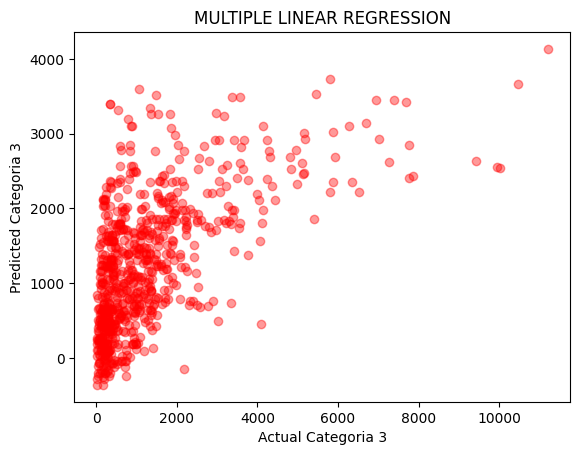

In [25]:
plt.scatter(y_test, y_pred, c='r', alpha=0.4)
plt.xlabel("Actual Categoria 3")
plt.ylabel("Predicted Categoria 3")
plt.title('MULTIPLE LINEAR REGRESSION')
plt.show()

In [26]:
print(lin_reg.coef_)

[ 498.32636995    5.6303915   898.02582018  246.32018163 -765.43776788
 1745.11391055 1093.00762232]


In [27]:
lin_reg.score(X_test, y_test)

0.3488019478757596

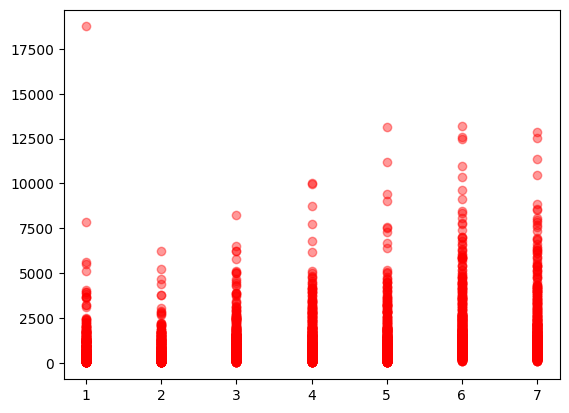

In [28]:
# 요일과 수요 관계
plt.scatter(data_sample[['Ziua saptamanii']], data_sample[['Categoria 3']], c='r', alpha=0.4)
plt.show()

In [ ]:
# 분기당 BNR 인플레이션율 과 수요 관계
plt.scatter(data_sample[['Rata inflatiei BNR pe trimestru']], data_sample[['Categoria 3']], c='r', alpha=0.4)
plt.show()

In [ ]:
# BIM 월별 실업률 과 수요 관계
plt.scatter(data_sample[['Rata somaj BIM lunara']], data_sample[['Categoria 3']], c='r', alpha=0.4)
plt.show()


In [31]:
knn_reg = KNeighborsRegressor(n_neighbors = 3)

X1 = data_sample.drop(columns=['Categoria 3'])

y1 = data_sample['Categoria 3']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=True, random_state=1234)

In [32]:
#pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()) ])
pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', MinMaxScaler()) ])
X1_train = pipeline.fit_transform(X1_train)

In [33]:
knn_reg.fit(X1_train, y1_train)
X1_test = pipeline.transform(X1_test)
y1_pred = knn_reg.predict(X1_test)

In [34]:
mse1 = mean_squared_error(y1_test, y1_pred)
print("mse : " + str(mse1))

mse : 1748666.7781727044


In [35]:
rmse1 = np.sqrt(mse1)
print("rmse : " + str(rmse1))

rmse : 1322.3716490354384


In [36]:
test_value1 = [[7,1,1,2.4,9.1,1,0]]   # 336.04
test_predict1 = knn_reg.predict(test_value1)
test_predict1

array([643.79])

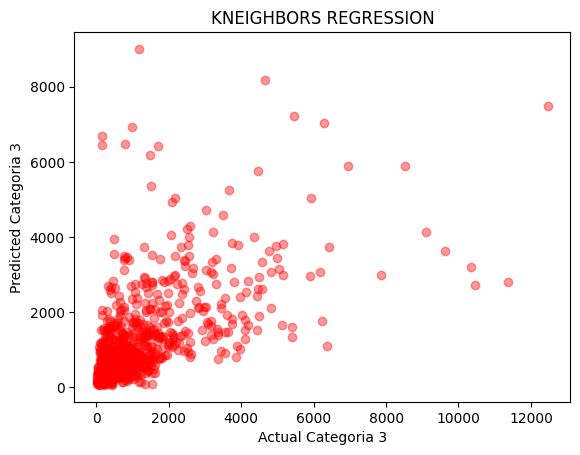

In [37]:
plt.scatter(y1_test, y1_pred, c='r', alpha=0.4)
plt.xlabel("Actual Categoria 3")
plt.ylabel("Predicted Categoria 3")
plt.title('KNEIGHBORS REGRESSION')
plt.show()

In [38]:
knn_reg.score(X1_test, y1_test)

0.26296628589452775

array([[<Axes: title={'center': 'Categoria 3'}>,
        <Axes: title={'center': 'Ziua saptamanii'}>,
        <Axes: title={'center': 'Ziua lunii'}>],
       [<Axes: title={'center': 'Luna'}>,
        <Axes: title={'center': 'Rata inflatiei BNR pe trimestru'}>,
        <Axes: title={'center': 'Rata somaj BIM lunara'}>],
       [<Axes: title={'center': 'Vacanta/zi libera/weekend/ Black Friday'}>,
        <Axes: title={'center': 'Abnormal situations (alerta, urgenta, razboi, pandemie)'}>,
        <Axes: >]], dtype=object)

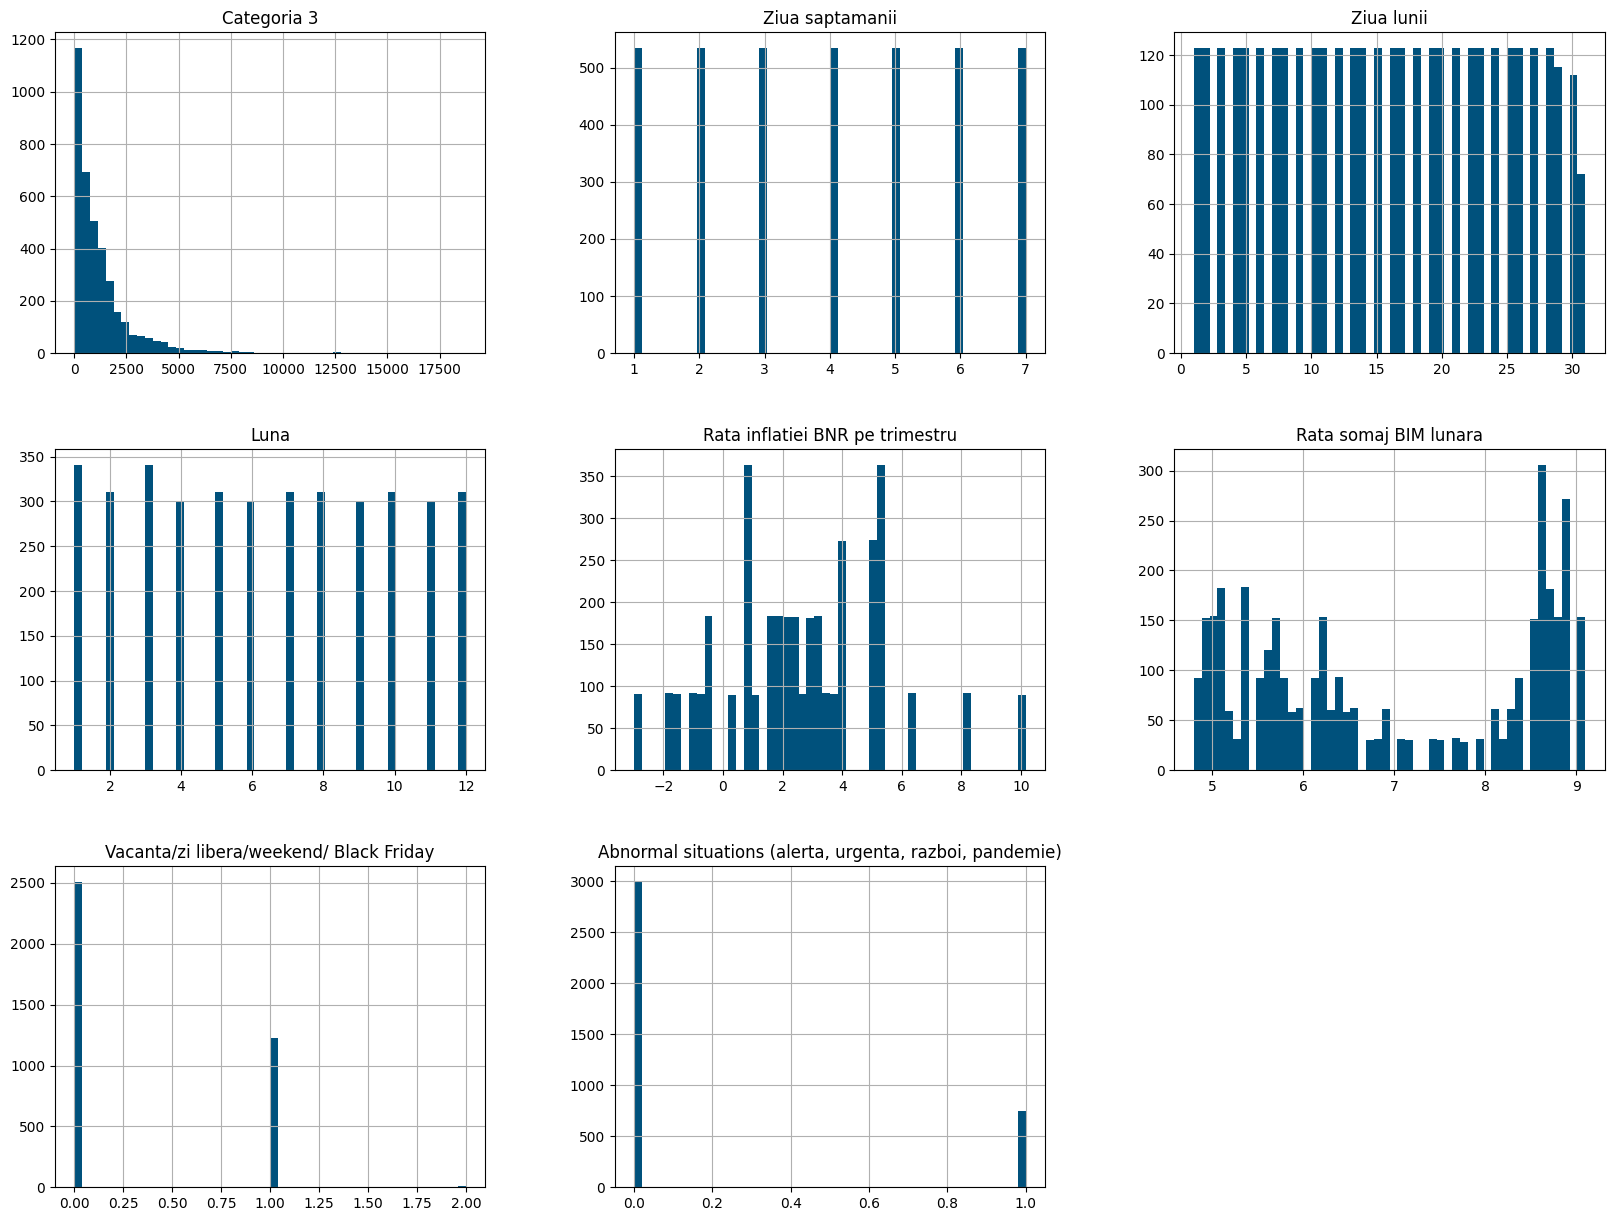

In [39]:
data_sample.hist(bins=50, color = '#00517C', figsize=(20,15))

In [40]:
tree_reg = DecisionTreeRegressor()

X2 = data_sample.drop(columns=['Categoria 3'])

y2 = data_sample['Categoria 3']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True, random_state=42)

In [41]:
#pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()) ])
pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', MinMaxScaler()) ])
X2_train = pipeline.fit_transform(X2_train)

In [42]:
tree_reg.fit(X2_train, y2_train)
X2_test = pipeline.transform(X2_test)
y2_pred = tree_reg.predict(X2_test)

In [43]:
mse2 = mean_squared_error(y2_test, y2_pred)
print("mse : " + str(mse2))

mse : 653467.5541632844


In [44]:
rmse2 = np.sqrt(mse2)
print("rmse : " + str(rmse2))

rmse : 808.3734002076543


In [45]:
test_value2 = [[7,1,1,2.4,9.1,1,0]]   # 336.04
test_predict2 = tree_reg.predict(test_value2)
test_predict2

array([1477.47])

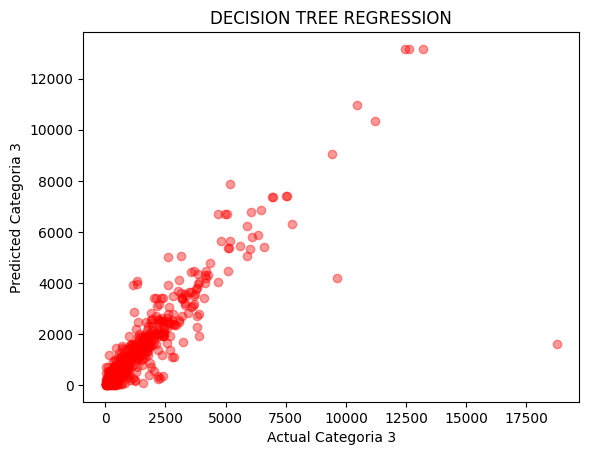

In [46]:
plt.scatter(y2_test, y2_pred, c='r', alpha=0.4)
plt.xlabel("Actual Categoria 3")
plt.ylabel("Predicted Categoria 3")
plt.title('DECISION TREE REGRESSION')
plt.show()

In [47]:
tree_reg.score(X2_test, y2_test)

0.7812093475163058

In [60]:
forest_reg = RandomForestRegressor()

X3 = data_sample.drop(columns=['Categoria 3'])

y3 = data_sample['Categoria 3']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, shuffle=True, random_state=999)

In [61]:
#pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()) ])
pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', MinMaxScaler()) ])
X3_train = pipeline.fit_transform(X3_train)

In [62]:
forest_reg.fit(X3_train, y3_train)
X3_test = pipeline.transform(X3_test)
y3_pred = tree_reg.predict(X3_test)

In [63]:
mse3 = mean_squared_error(y3_test, y3_pred)
print("mse : " + str(mse3))

mse : 41468.15757863819


In [64]:
rmse3 = np.sqrt(mse3)
print("rmse : " + str(rmse3))

rmse : 203.6373187277769


In [65]:
test_value3 = [[7,1,1,2.4,9.1,1,0]]   # 336.04
test_predict3 = forest_reg.predict(test_value3)
test_predict3

array([1351.4486])

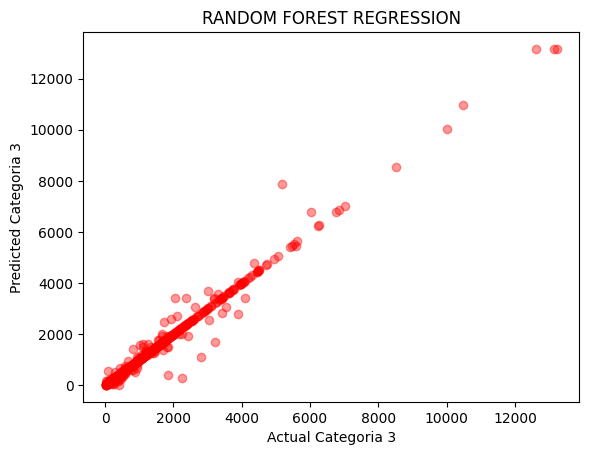

In [66]:
plt.scatter(y3_test, y3_pred, c='r', alpha=0.4)
plt.xlabel("Actual Categoria 3")
plt.ylabel("Predicted Categoria 3")
plt.title('RANDOM FOREST REGRESSION')
plt.show()

In [67]:
forest_reg.score(X3_test, y3_test)

0.8984765367095402